In [1]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
data = pd.read_csv("./data/daily_minimum_temperatures.csv", sep=",")
print(data.shape)
data.head()

(3650, 2)


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


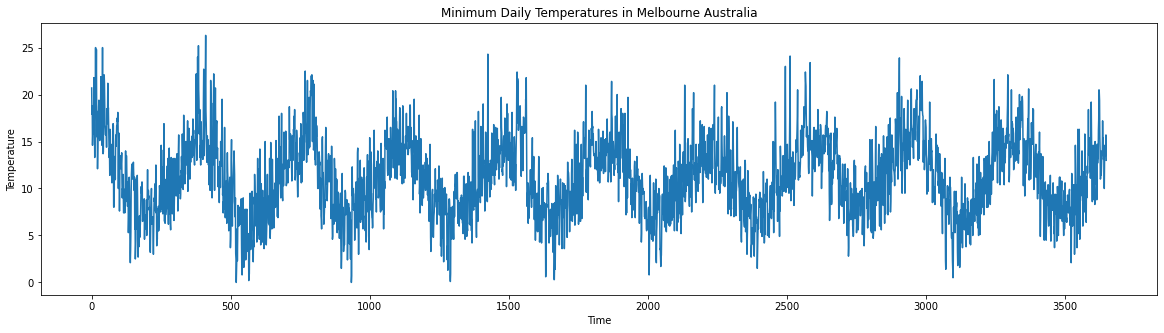

In [4]:
plt.figure(figsize = [20,5])
plt.plot(data.Temp)
plt.title("Minimum Daily Temperatures in Melbourne Australia")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.show()

In [5]:
train_percentage = 0.67
train_size = int(len(data)*train_percentage)

train = data[:train_size]
test = data[train_size:]
train = train.rename(columns={'Date': 'ds', 'Temp': 'y'}) #columns names: "ds" and "y" https://facebook.github.io/prophet/docs/quick_start.html#python-api
test = test.rename(columns={'Date': 'ds', 'Temp': 'y'})
print(train.shape)
train.head()

(2445, 2)


,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
prophet_basic = Prophet()
prophet_basic.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
predictions = prophet_basic.make_future_dataframe(periods=test.shape[0]+1)
predictions.tail(2)

,ds
3649,1990-12-30
3650,1990-12-31


In [8]:
predictions = prophet_basic.predict(predictions)
predictions.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3646,1990-12-27,10.421913,9.713228,17.215874,9.801799,11.094441,3.110730,3.110730,3.110730,-0.164002,-0.164002,-0.164002,3.274732,3.274732,3.274732,0.0,0.0,0.0,13.532643
3647,1990-12-28,10.421672,10.127378,17.252242,9.800917,11.095344,3.319276,3.319276,3.319276,-0.032556,-0.032556,-0.032556,3.351832,3.351832,3.351832,0.0,0.0,0.0,13.740948
3648,1990-12-29,10.421431,10.124221,17.109441,9.800035,11.096184,3.387266,3.387266,3.387266,-0.037674,-0.037674,-0.037674,3.424941,3.424941,3.424941,0.0,0.0,0.0,13.808698
3649,1990-12-30,10.421190,10.277820,17.299523,9.799153,11.096954,3.301016,3.301016,3.301016,-0.191998,-0.191998,-0.191998,3.493014,3.493014,3.493014,0.0,0.0,0.0,13.722207
3650,1990-12-31,10.420949,10.348349,17.446756,9.798272,11.097724,3.609205,3.609205,3.609205,0.054088,0.054088,0.054088,3.555117,3.555117,3.555117,0.0,0.0,0.0,14.030154


In [9]:
predictions[["ds", "yhat"]].dtypes

ds      datetime64[ns]
yhat           float64
dtype: object

In [10]:
test['ds'] = pd.to_datetime(test['ds'])
results = pd.merge(test, predictions[["ds", "yhat"]], on = ["ds"], how='left')

In [11]:
results.tail()

,ds,y,yhat
1200,1990-12-27,14.0,13.532643
1201,1990-12-28,13.6,13.740948
1202,1990-12-29,13.5,13.808698
1203,1990-12-30,15.7,13.722207
1204,1990-12-31,13.0,14.030154


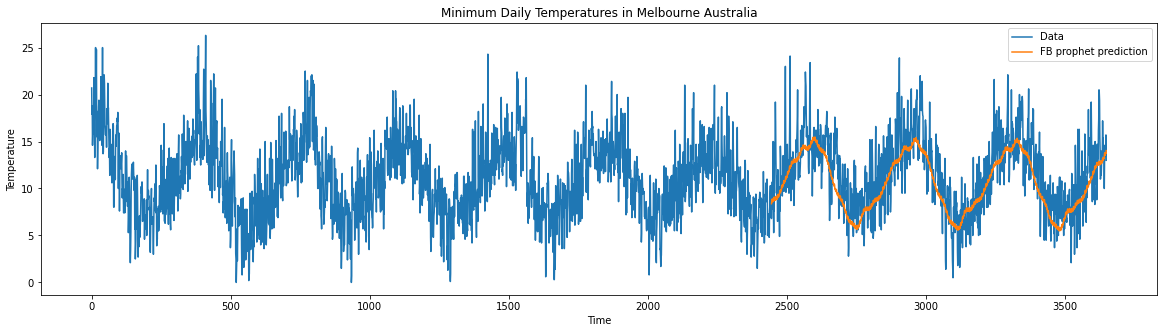

In [12]:
index_start = len(train)
index_end = len(train) + len(test)
plt.figure(figsize = [20,5])
plt.plot(data.Temp, label="Data")
plt.plot(range(index_start, index_end), results.yhat.values, label="FB prophet prediction")
plt.title("Minimum Daily Temperatures in Melbourne Australia")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

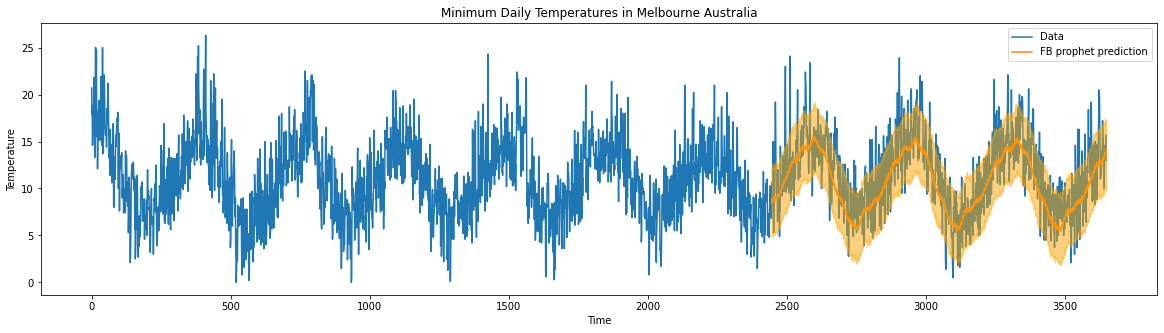

In [13]:
plt.figure(figsize = [20,5])
plt.plot(data.Temp, label="Data", zorder = 1)
plt.plot(range(index_start, index_end), results.yhat.values, label="FB prophet prediction", zorder = 2)
plt.fill_between(range(len(train), len(train) + len(test)), predictions.yhat_lower.values[index_start:index_end], predictions.yhat_upper.values[index_start:index_end], alpha=0.5, color ="orange", zorder = 3)
plt.title("Minimum Daily Temperatures in Melbourne Australia")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [14]:
mean_squared_error(results.y, results.yhat)

8.16344811923961

In [15]:
results

,ds,y,yhat
0,1987-09-13,6.8,8.377071
1,1987-09-14,9.3,8.671704
2,1987-09-15,9.8,8.849383
3,1987-09-16,10.7,8.890969
4,1987-09-17,7.8,8.579298
...,...,...,...
1200,1990-12-27,14.0,13.532643
1201,1990-12-28,13.6,13.740948
1202,1990-12-29,13.5,13.808698
1203,1990-12-30,15.7,13.722207
